In [23]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Loading Data
data=pd.read_csv(r'diabetes.csv')

## **Explore Data**

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Analysis**

<Axes: >

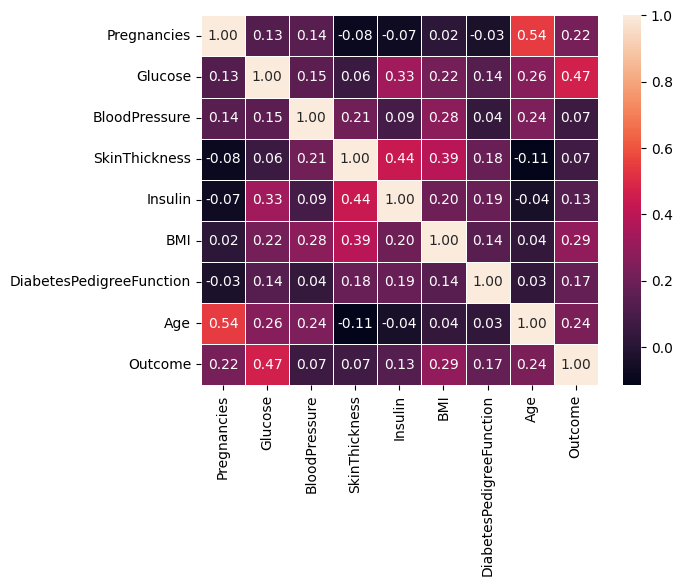

In [21]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.2f',linewidths=0.5 )

<Axes: xlabel='Outcome', ylabel='count'>

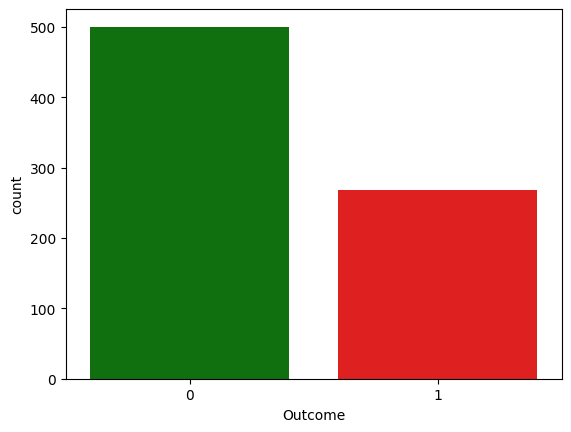

In [24]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

## **Create Model**

In [26]:

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

In [97]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [28]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [29]:
print('old data set shape{}'.format(Counter(y)))
print('old data set shape{}'.format(Counter(y_res)))

old data set shapeCounter({0: 500, 1: 268})
old data set shapeCounter({1: 500, 0: 500})


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41,shuffle=True)

In [113]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}


In [114]:
# Prepare lists to store results
col = []
result1 = []  # accuracy
result2 = []  # recall
result3 = []  # precision
result4 = []  # f1 score

In [116]:
# Define one evaluation function
def cal(model, name):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)

    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre)
    precision = precision_score(y_test, pre)
    f1 = f1_score(y_test, pre)

    col.append(name)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    # Optional: Confusion matrix plot
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print(f' {name}')
    print(f'  Accuracy : {accuracy:.4f}')
    print(f'  Recall   : {recall:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  F1 Score : {f1:.4f}')
    print('-'*40)


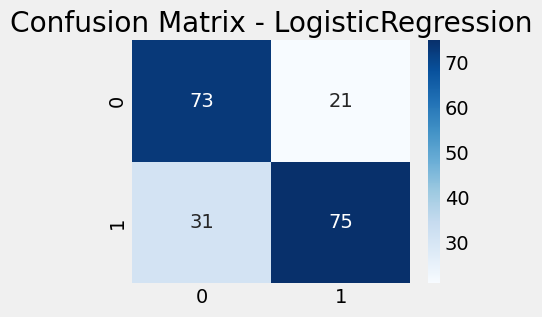

 LogisticRegression
  Accuracy : 0.7400
  Recall   : 0.7075
  Precision: 0.7812
  F1 Score : 0.7426
----------------------------------------


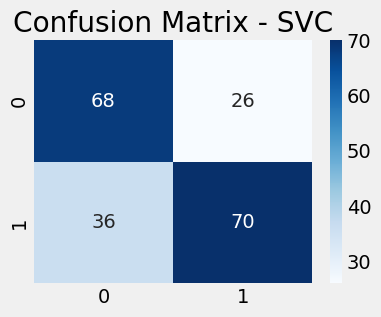

 SVC
  Accuracy : 0.6900
  Recall   : 0.6604
  Precision: 0.7292
  F1 Score : 0.6931
----------------------------------------


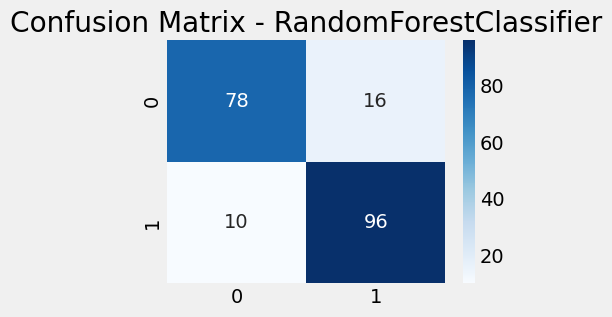

 RandomForestClassifier
  Accuracy : 0.8700
  Recall   : 0.9057
  Precision: 0.8571
  F1 Score : 0.8807
----------------------------------------


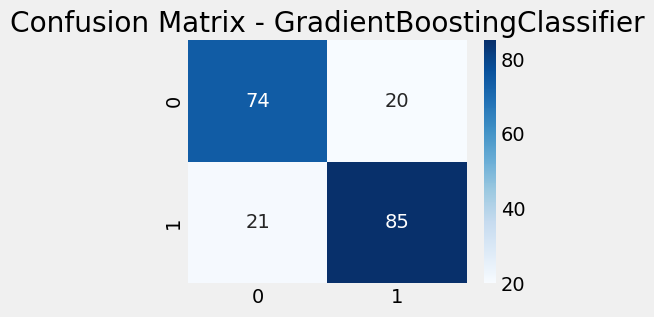

 GradientBoostingClassifier
  Accuracy : 0.7950
  Recall   : 0.8019
  Precision: 0.8095
  F1 Score : 0.8057
----------------------------------------


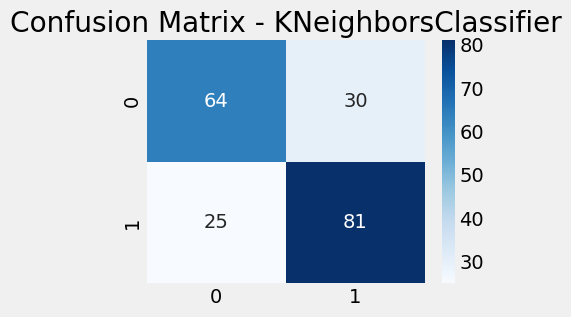

 KNeighborsClassifier
  Accuracy : 0.7250
  Recall   : 0.7642
  Precision: 0.7297
  F1 Score : 0.7465
----------------------------------------


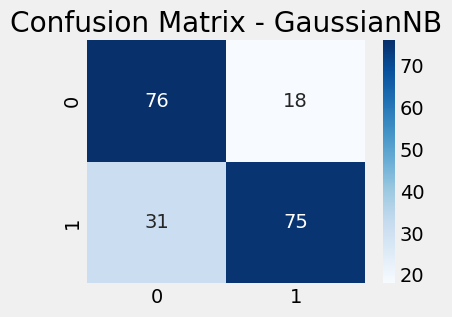

 GaussianNB
  Accuracy : 0.7550
  Recall   : 0.7075
  Precision: 0.8065
  F1 Score : 0.7538
----------------------------------------


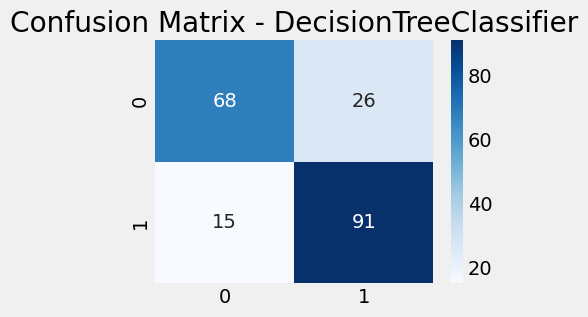

 DecisionTreeClassifier
  Accuracy : 0.7950
  Recall   : 0.8585
  Precision: 0.7778
  F1 Score : 0.8161
----------------------------------------


In [117]:
# Loop through all models
for name, model in models.items():
    cal(model, name)

In [118]:
final_result = pd.DataFrame({
    'Algorithm': col,
    'Accuracy': result1,
    'Recall': result2,
    'Precision': result3,
    'F1 Score': result4
})

display(final_result)

,Algorithm,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.740,0.707547,0.781250,0.742574
1,SVC,0.690,0.660377,0.729167,0.693069
2,RandomForestClassifier,0.870,0.905660,0.857143,0.880734
3,GradientBoostingClassifier,0.795,0.801887,0.809524,0.805687
4,KNeighborsClassifier,0.725,0.764151,0.729730,0.746544
5,GaussianNB,0.755,0.707547,0.806452,0.753769
6,DecisionTreeClassifier,0.795,0.858491,0.777778,0.816143


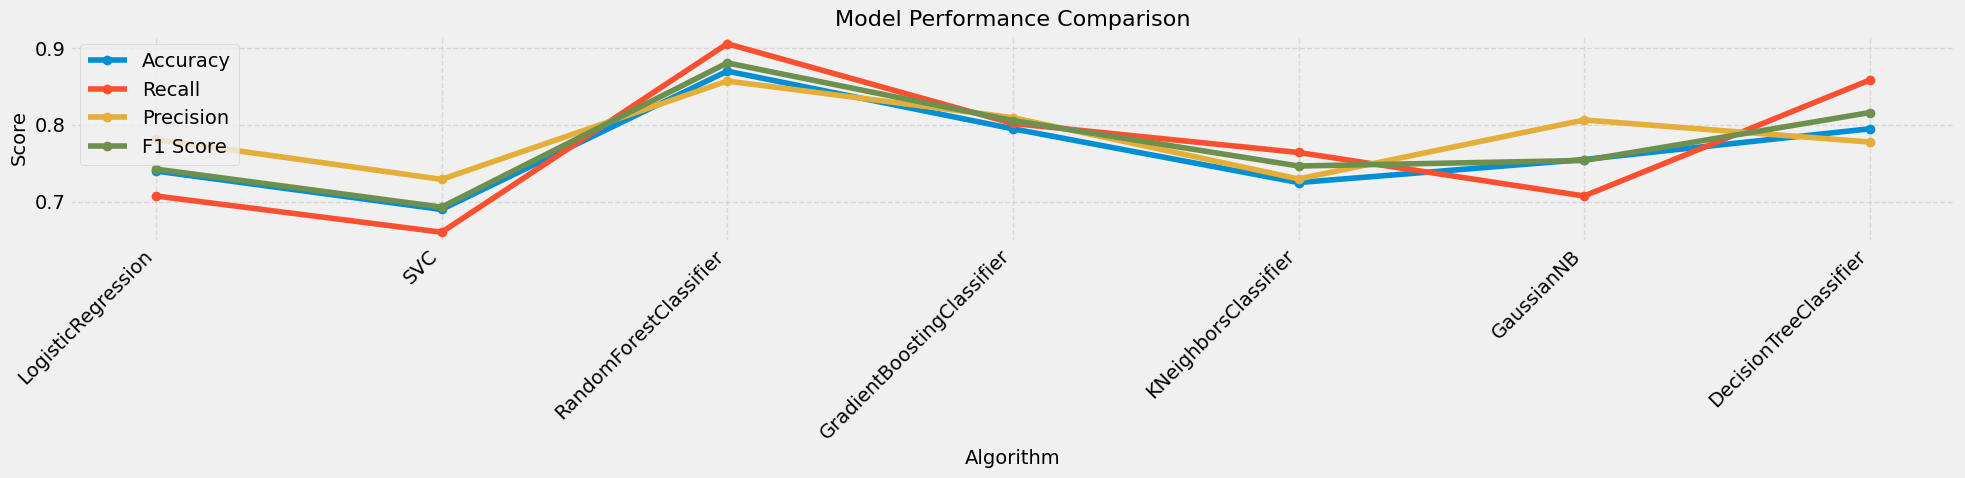

In [120]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.plot(final_result['Algorithm'], final_result['Accuracy'], label='Accuracy', marker='o')
plt.plot(final_result['Algorithm'], final_result['Recall'], label='Recall', marker='o')
plt.plot(final_result['Algorithm'], final_result['Precision'], label='Precision', marker='o')
plt.plot(final_result['Algorithm'], final_result['F1 Score'], label='F1 Score', marker='o')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **Hidden Step To Get Best Parameters To My Model**

In [121]:
"""param_grid = {
    'n_estimators': [100, 500, 1000,1500],
    'max_depth': [None, 5,7, 10],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2,3, 4]
}"""

"param_grid = {\n    'n_estimators': [100, 500, 1000,1500], \n    'max_depth': [None, 5,7, 10], \n    'min_samples_split': [2, 5,7, 10], \n    'min_samples_leaf': [1, 2,3, 4]\n}"

In [122]:
"""model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(x_res,y_res)
print(grid_search.best_params_)"""

'model=RandomForestClassifier()\nfrom sklearn.model_selection import GridSearchCV\ngrid_search = GridSearchCV(model, param_grid=param_grid, cv=5)\ngrid_search.fit(x_res,y_res)\nprint(grid_search.best_params_)'